In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("C:/Users/jifsk/Downloads/DATASET.csv")

In [3]:
df.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [4]:
df.isnull().sum()

Review    16
label      0
dtype: int64

In [5]:
df['Review'] = df['Review'].fillna("")

In [6]:
df.isnull().sum()

Review    0
label     0
dtype: int64

In [7]:
df.describe()

,Review,label
count,52702,52702
unique,51473,2
top,Good,NEGATIVE
freq,153,29423


## Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

The main focus of this model will to cluster the reviews into similar text to determine what reviews are positive and etc.

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jifsk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jifsk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jifsk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df['Review'] = df['Review'].apply(preprocess)

In [10]:
df.head()

,Review,label
0,great music service audio high quality app eas...,POSITIVE
1,please ignore previous negative rating app sup...,POSITIVE
2,popup get best spotify experience android 12 a...,NEGATIVE
3,really buggy terrible use recently,NEGATIVE
4,dear spotify get song didnt put playlist shuff...,NEGATIVE


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Review'])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
X_pca = pca.fit_transform(X.toarray())
X_pca

array([[ 1.34757564e-01, -3.30829682e-02,  2.31452836e-03, ...,
         3.02600029e-02, -4.54400223e-02,  6.93327920e-02],
       [ 2.12142710e-02, -3.18989020e-02, -1.66832982e-02, ...,
        -4.92475163e-02,  1.03989866e-01, -1.68030603e-02],
       [ 2.96126587e-02, -6.30250262e-02, -5.36492954e-02, ...,
         2.17426403e-01, -1.90543206e-03, -5.19434137e-02],
       ...,
       [-5.39977216e-02, -2.48454621e-02, -1.36750228e-02, ...,
        -2.49888496e-02,  1.71781873e-02,  1.38898877e-02],
       [ 1.81930392e-01,  9.16486820e-01,  1.41032130e-01, ...,
        -2.23537340e-02,  5.96626743e-03,  1.05372059e-02],
       [ 1.12533317e-01, -2.35188773e-02, -1.36808702e-01, ...,
        -2.36881269e-02, -2.20847172e-02,  3.59475182e-04]],
      shape=(52702, 50))

In [13]:
km = KMeans(n_clusters =2,random_state = 10)
labels = km.fit_predict(X_pca)
df['cluster'] = labels
df.head()

,Review,label,cluster
0,great music service audio high quality app eas...,POSITIVE,1
1,please ignore previous negative rating app sup...,POSITIVE,1
2,popup get best spotify experience android 12 a...,NEGATIVE,1
3,really buggy terrible use recently,NEGATIVE,1
4,dear spotify get song didnt put playlist shuff...,NEGATIVE,0


In [14]:
df.tail()

,Review,label,cluster
52697,yes best,POSITIVE,1
52698,spotify heart feb 2024 heart music lyric langu...,POSITIVE,1
52699,tried open app wont open restarted phone ill t...,POSITIVE,1
52700,good,POSITIVE,1
52701,nice app play music affordable price,POSITIVE,1


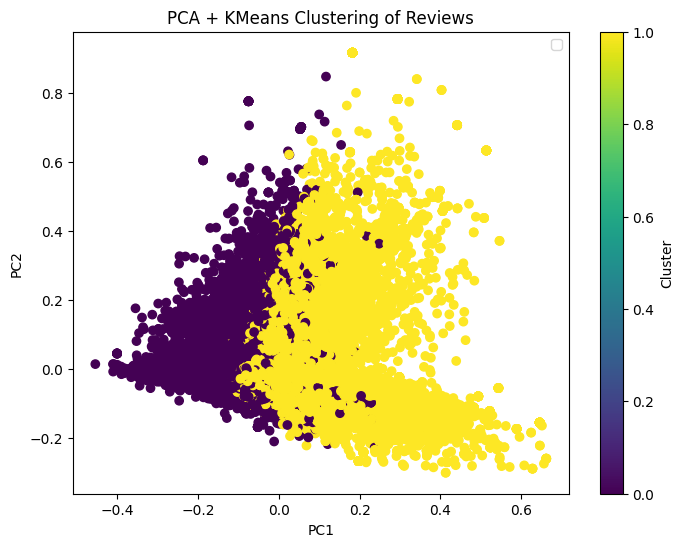

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("PCA + KMeans Clustering of Reviews")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [16]:
km.inertia_

14857.919253057267

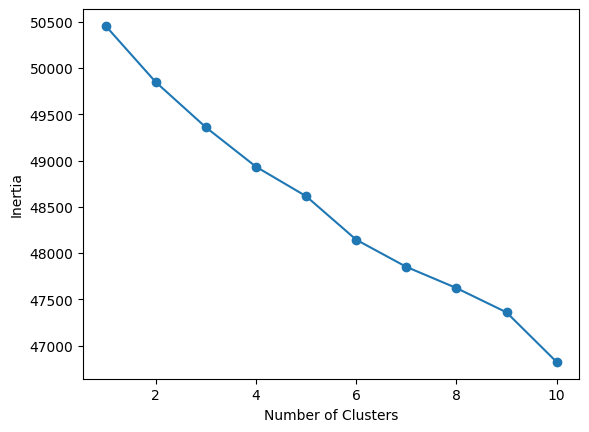

In [17]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [18]:
km = KMeans(n_clusters =9,random_state = 10)
labels = km.fit_predict(X_pca)
df['cluster'] = labels

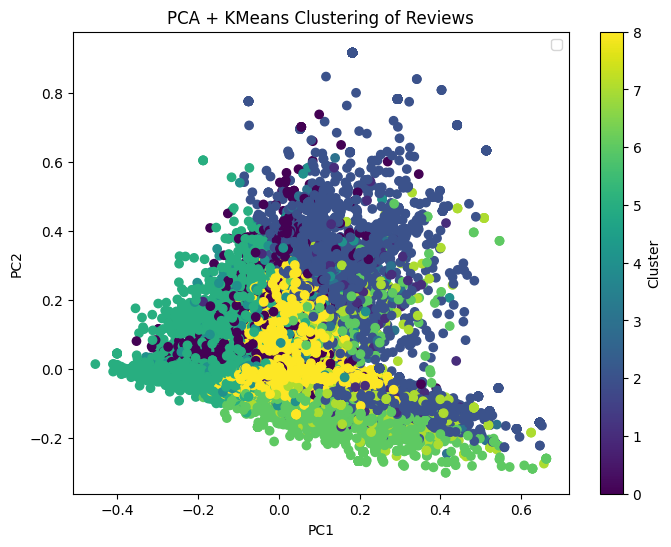

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("PCA + KMeans Clustering of Reviews")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [20]:
sentiment_distribution = df.groupby('cluster')['label'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

label    NEGATIVE  POSITIVE
cluster                    
0        0.779835  0.220165
1        0.155726  0.844274
2        0.083313  0.916687
3        0.350257  0.649743
4        0.615723  0.384277
5        0.757954  0.242046
6        0.108376  0.891624
7        0.166961  0.833039
8        0.671570  0.328430


In [21]:
import numpy as np
import pandas as pd

# Reuse the TF-IDF vectorizer you fit earlier
tfidf_matrix = vectorizer.transform(df['Review'])  # shape: [n_samples, n_features]
terms = vectorizer.get_feature_names_out()

# Create a DataFrame from TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df['cluster'] = df['cluster']

# Get top 10 keywords per cluster
top_keywords = {}

for cluster_id in sorted(df['cluster'].unique()):
    cluster_tfidf = tfidf_df[tfidf_df['cluster'] == cluster_id].drop('cluster', axis=1)
    mean_tfidf = cluster_tfidf.mean().sort_values(ascending=False)
    top_keywords[cluster_id] = mean_tfidf.head(10).index.tolist()

# Display keywords
for cluster_id, keywords in top_keywords.items():
    print(f"\nCluster {cluster_id} top keywords: {', '.join(keywords)}")



Cluster 0 top keywords: ad, many, song, app, much, premium, good, music, get, every

Cluster 1 top keywords: easy, use, music, great, app, love, find, good, navigate, selection

Cluster 2 top keywords: good, best, music, app, ever, streaming, spotify, song, listening, quality

Cluster 3 top keywords: ðÿ, app, music, song, love, spotify, good, best, ad, great

Cluster 4 top keywords: add, song, playlist, app, music, like, please, good, many, listen

Cluster 5 top keywords: song, play, playlist, cant, want, listen, app, like, even, dont

Cluster 6 top keywords: love, spotify, music, app, listen, song, playlist, best, much, listening

Cluster 7 top keywords: great, music, app, selection, love, spotify, listen, podcasts, song, listening

Cluster 8 top keywords: app, music, spotify, update, premium, playing, like, time, im, stop


## DBSCAN

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

X = X_pca 
# Use min_samples = 5 (or your chosen value)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of the 5th nearest neighbor for each point
k_distances = np.sort(distances[:, 4])  # index 4 = 5th neighbor

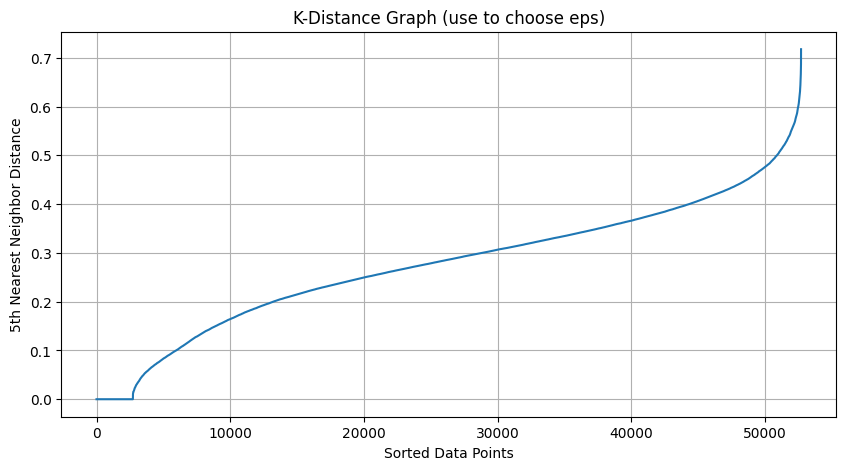

In [23]:
plt.figure(figsize=(10,5))
plt.plot(k_distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Sorted Data Points")
plt.title("K-Distance Graph (use to choose eps)")
plt.grid(True)
plt.show()


In [25]:
from sklearn.cluster import DBSCAN

# You can try both X_reduced or X_umap
dbscan = DBSCAN(eps=0.5, min_samples=5)  # tweak eps based on data
clusters = dbscan.fit_predict(X_pca)

df['dbscan_cluster'] = clusters


In [26]:
df['dbscan_cluster'].value_counts()

dbscan_cluster
 0    51973
-1      725
 1        4
Name: count, dtype: int64

In [27]:
df.groupby('dbscan_cluster')['label'].value_counts(normalize=True)

dbscan_cluster  label   
-1              POSITIVE    0.794483
                NEGATIVE    0.205517
 0              NEGATIVE    0.563254
                POSITIVE    0.436746
 1              POSITIVE    1.000000
Name: proportion, dtype: float64

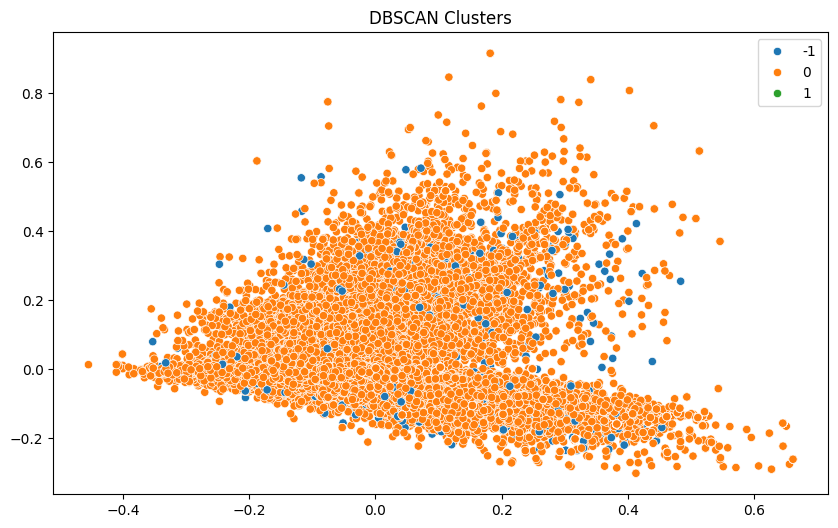

In [29]:
# UMAP 2D visualization (or PCA)
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', legend='full')
plt.title('DBSCAN Clusters')
plt.show()

## Mean Shift Clustering 

In [30]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate bandwidth (similar to eps in DBSCAN)
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=5000)

# Run mean shift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X_pca)

# Assign clusters
df['mean_shift_cluster'] = mean_shift.labels_

In [31]:
df['mean_shift_cluster'].value_counts()

# Optional: Look at distribution of sentiment per cluster
df.groupby('mean_shift_cluster')['label'].value_counts(normalize=True)

mean_shift_cluster  label   
0                   NEGATIVE    0.55829
                    POSITIVE    0.44171
Name: proportion, dtype: float64

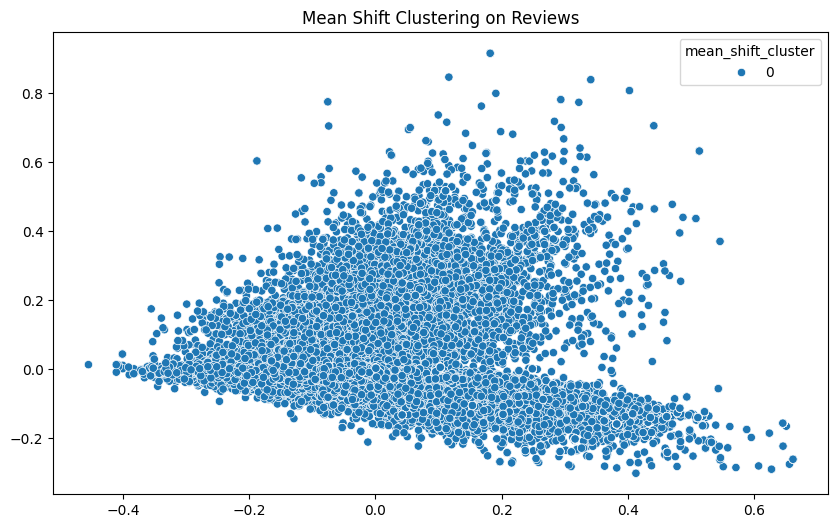

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['mean_shift_cluster'], palette='tab10')
plt.title('Mean Shift Clustering on Reviews')
plt.show()


## Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?

From the various clustering methods for Spotify reviews it looks like KMeans outperfrom Mean Shift and DBSCAN as they dont generalize well and KMeans captures the data pretty well as it shows words and how they are clustered together. Although they are somewhat intersecting with each other it gives the general idea which clusters and data points are positive and negative.

## Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 

the flaws with the model is that the DBSCAN and Mean shift does not do well as it looks like they shift towards to either a lot of positive reviews over negative and vice versa. A plan of action is to explore other unsupervised models to approach this problem or tune the hyperparameters of the models for DBSCAN and Mean shift clustering.